In [15]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("winequality-red 2.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
#Creating a copy of data for processing
df2 = df.copy()
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
df2.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [22]:
df.groupby("quality").fixed_acidity.describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,8.360000,1.770875,6.7,7.15,7.50,9.875,11.6
4,53.0,7.779245,1.626624,4.6,6.80,7.50,8.400,12.5
5,681.0,8.167254,1.563988,5.0,7.10,7.80,8.900,15.9
6,638.0,8.347179,1.797849,4.7,7.00,7.90,9.400,14.3
7,199.0,8.872362,1.992483,4.9,7.40,8.80,10.100,15.6
8,18.0,8.566667,2.119656,5.0,7.25,8.25,10.225,12.6


In [26]:
df2.fixed_acidity.value_counts()

fixed_acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64

In [23]:
df.groupby("quality").alcohol.describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


In [27]:
df2.alcohol.value_counts()

alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64

In [24]:
df.groupby("quality").sulphates.describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,0.570000,0.122020,0.40,0.5125,0.545,0.615,0.86
4,53.0,0.596415,0.239391,0.33,0.4900,0.560,0.600,2.00
5,681.0,0.620969,0.171062,0.37,0.5300,0.580,0.660,1.98
6,638.0,0.675329,0.158650,0.40,0.5800,0.640,0.750,1.95
7,199.0,0.741256,0.135639,0.39,0.6500,0.740,0.830,1.36
8,18.0,0.767778,0.115379,0.63,0.6900,0.740,0.820,1.10


In [28]:
df2.sulphates.value_counts()

sulphates
0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: count, Length: 96, dtype: int64

In [25]:
df.groupby("quality").residual_sugar.describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,2.635000,1.401596,1.2,1.875,2.1,3.10,5.7
4,53.0,2.694340,1.789436,1.3,1.900,2.1,2.80,12.9
5,681.0,2.528855,1.359753,1.2,1.900,2.2,2.60,15.5
6,638.0,2.477194,1.441576,0.9,1.900,2.2,2.50,15.4
7,199.0,2.720603,1.371509,1.2,2.000,2.3,2.75,8.9
8,18.0,2.577778,1.295038,1.4,1.800,2.1,2.60,6.4


In [29]:
df2.residual_sugar.value_counts()

residual_sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64

In [30]:
corrs = df2.corr()
corrs

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


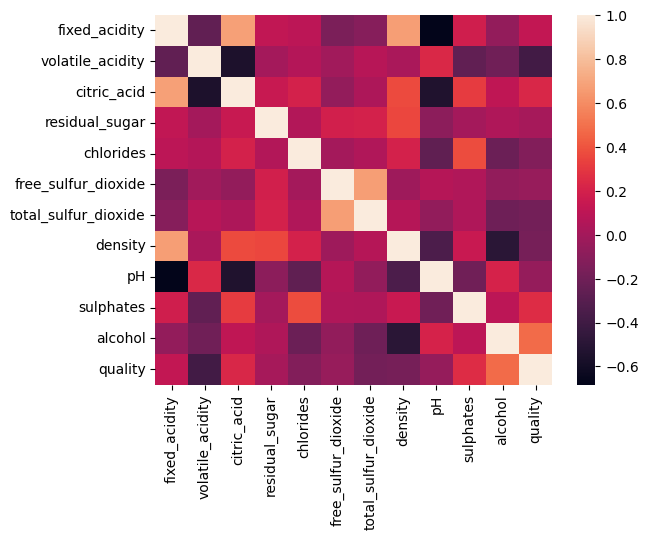

In [31]:
sns.heatmap(corrs)
plt.show()